## Data Visualization Methods

### [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)

- Principal Component Analysis (PCA) is a standard method for dimensionality reduction and data visualization.
- The goal is to obtain lower-dimensional data while preserving as much of the data's variance as possible.
- If only 2 principal compenents are used, then the data points can be visualized in a scatter plot.

#### Theory

- input matrix: $X \in \mathbb{R}^{n \times d}$
- eigenvalue decomposition of the "covariance" matrix: $X^T X = W \Lambda W^T$,<br>where $\Lambda$ is the diagonal matrix of eigenvalues and the columns of $W$ contain the associated eigenvectors
- the eigenvalues are sorted in descending order
- dimensionality reduction: $Y = X W_K$, where $K < d$ and $W_K$ contains the first $K$ columns of $W$

**Exercise 1**: Visualize the Wisconsin Breast Cancer data set using PCA!

In [1]:
# Load the data to DataFrame.
import pandas as pd
names = [
    'Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
    'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('wisconsin_data.txt', sep=',', names=names, na_values='?')
df['Bare_Nuclei'].fillna(0, inplace=True)
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [2]:
# extract input matrix
X = df[names[1: -1]].values
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [3]:
# target vector
y = (df['Class'] // 2 - 1).values
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [4]:
X.shape

(699, 9)

In [5]:
# Scikit-Learn based implementation.
from sklearn.decomposition import PCA

In [7]:
pca = PCA(2)

pca.fit(X)         # compute the Eigenvaluse decomposition of X.T * X
pca.transform(X)   # compute X * W_K

array([[-4.40904732,  0.01994907],
       [ 4.88110465, -4.90332617],
       [-4.56415067, -0.65506726],
       ...,
       [10.33687644,  7.24412961],
       [ 6.47179821,  2.54870704],
       [ 7.56560301,  1.23300626]])

In [9]:
Z = pca.fit_transform(X) # fit then transform
Z

array([[-4.40904732,  0.01994907],
       [ 4.88110465, -4.90332617],
       [-4.56415067, -0.65506726],
       ...,
       [10.33687644,  7.24412961],
       [ 6.47179821,  2.54870704],
       [ 7.56560301,  1.23300626]])

In [13]:
# NumPy based implementation.
import numpy as np

In [16]:
L, W = np.linalg.eig(X.T @ X)

In [18]:
X @ W[:, :2] # we need to normalize the data first to get the same numbers as PCA

array([[ -5.5575981 ,   2.72394367],
       [-14.27709561,  -3.65497485],
       [ -5.12657674,   0.83023754],
       ...,
       [-19.59607153,   2.61494677],
       [-15.76257823,  -0.14650159],
       [-16.83841841,  -1.11365866]])

In [19]:
# NumPy based implementation.
import numpy as np

X2 = X - X.mean(axis=0)       # subtract column means 
L, W = np.linalg.eig(X2.T @ X2) # eigenvalue decomposition
#np.linalg.norm(W[:, 0])

X2 @ W[:, :2]

array([[  4.40904732,  -0.01994907],
       [ -4.88110465,   4.90332617],
       [  4.56415067,   0.65506726],
       ...,
       [-10.33687644,  -7.24412961],
       [ -6.47179821,  -2.54870704],
       [ -7.56560301,  -1.23300626]])

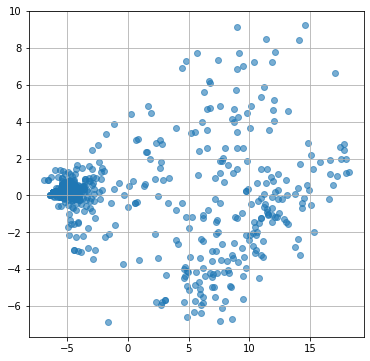

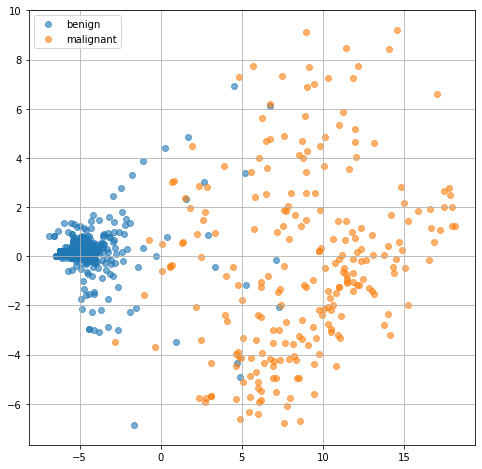

In [22]:
# Visualization.
# scatter plot of the data
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.6)
plt.grid(True)
# use different color for positive and negative examples
pos = df['Class'] == 4
plt.figure(figsize=(8, 8))
plt.scatter(Z[~pos, 0], Z[~pos, 1], alpha=0.6)
plt.scatter(Z[pos, 0], Z[pos, 1], alpha=0.6)
plt.grid(True)
plt.legend(['benign', 'malignant'])

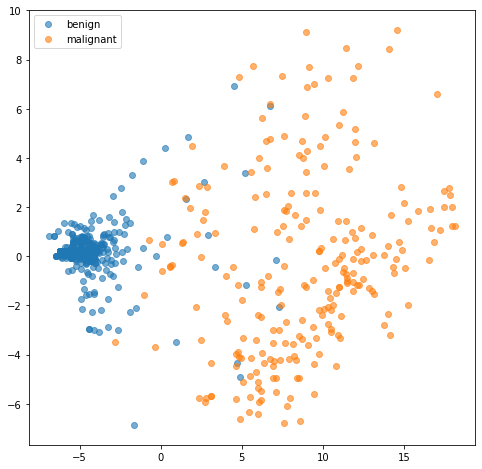

In [23]:
# Visualization.
import matplotlib.pyplot as plt

cond = (y == 0)
plt.figure(figsize=(8, 8))
plt.scatter(Z[cond, 0], Z[cond, 1], alpha=0.6)
plt.scatter(Z[~cond, 0], Z[~cond, 1], alpha=0.6)
plt.legend(['benign', 'malignant'])

**Exercise 2**: Measure the cross-validation accuracy of gradient boosting, so that we reduce the dimensions to 1, 2, ..., 9 using PCA.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [31]:
cv = KFold(5, shuffle=True, random_state=42) 
cl = GradientBoostingClassifier(random_state=42)
cross_val_score(cl, X, y, cv=cv, scoring='accuracy').mean()

0.9570709146968139

In [32]:
res = []
for K in range(1, 10):
    Y = PCA(n_components=K).fit_transform(X)
    res.append({
        'K': K,
        'accuracy': cross_val_score(cl, Y, y, cv=cv, scoring='accuracy').mean()
    })
res = pd.DataFrame(res).set_index('K')
res

,accuracy
K,
1,0.962785
2,0.957050
3,0.961336
4,0.965653
5,0.964224
6,0.964224
7,0.964224
8,0.961357
9,0.962785


<AxesSubplot: xlabel='K'>

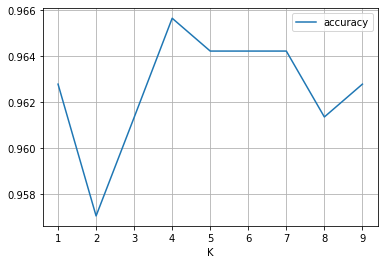

In [33]:
res.plot(grid=True)

### [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

- t-Distributed Stochastic Neighbor Embedding (t-SNE) can be viewed as a modernized version of PCA.
- PCA is global in nature: it tries to preserve the distances between any pairs of data points. This leads to visualizations where the points form an elliptical blob.
- The key idea of t-SNE is to is to preserve only the local relationship between the data points. If two data points are close in the original space, then they should be close in the transformed space too. However, large distances in the original space are not preserved in the transformed space.
- A detailed blog post about t-SNE and PCA can be read [here](https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea) and [here](https://projector.tensorflow.org).


#### Theory

- data points (rows of the input matrix): $x_1, \dots, x_n \in \mathbb{R}^d$
- conditional probabilities: $p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_2)}$, $p_{i|i} = 0$
- probabilities: $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$
- the $\sigma_i$ values are is set using the bisection method so that the [perplexity](https://en.wikipedia.org/wiki/Perplexity) of the conditional distribution equals a predefined perplexity
- transformed data points: $y_1, \dots, y_n \in \mathbb{R}^K$
- transformed probabilities: $q_{ij} = \frac{\left(1 + \|y_i - y_j\|^2\right)^{-1}}{\sum_k \sum_{l \neq k} \left(1 + \|y_k - y_l\|^2\right)^{-1}}$
-  Kullback–Leibler divergence: $KL(y_1, \dots, y_n) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$
- the minimization of the KL divergence performed using approximate gradient descent

**Exercise 3**: Prepare the t-SNE visualization of the Wisconsin Breast Cancer data set.

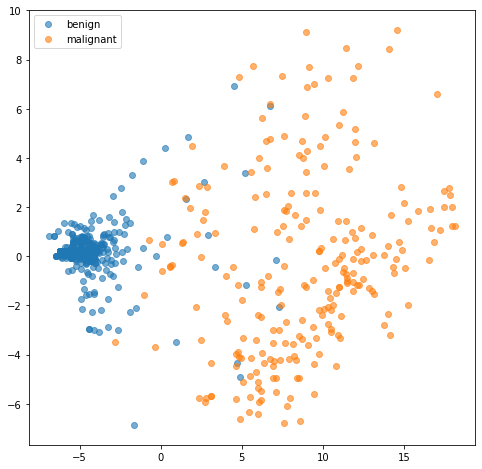

In [34]:
# Visualization.
import matplotlib.pyplot as plt

def visualize(Z, y):
    cond = (y == 0)
    plt.figure(figsize=(8, 8))
    plt.scatter(Z[cond, 0], Z[cond, 1], alpha=0.6)
    plt.scatter(Z[~cond, 0], Z[~cond, 1], alpha=0.6)
    plt.legend(['benign', 'malignant'])


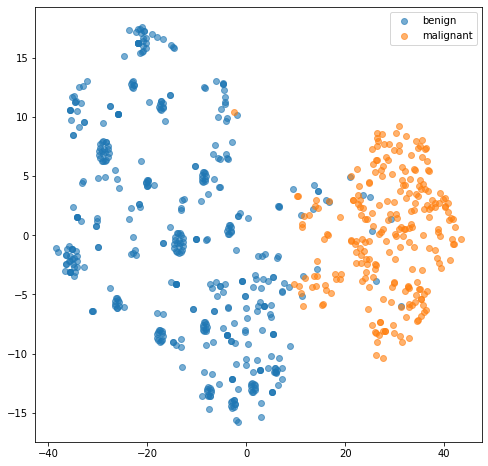

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(2)
Z = tsne.fit_transform(X)
visualize(Z, y)

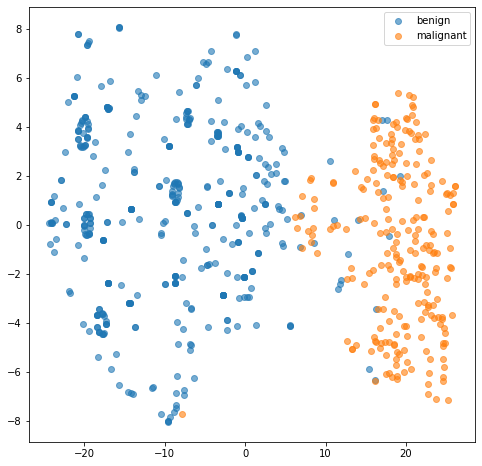

In [36]:
# Try different perplexity values!
visualize(TSNE(2, perplexity=60).fit_transform(X), y)

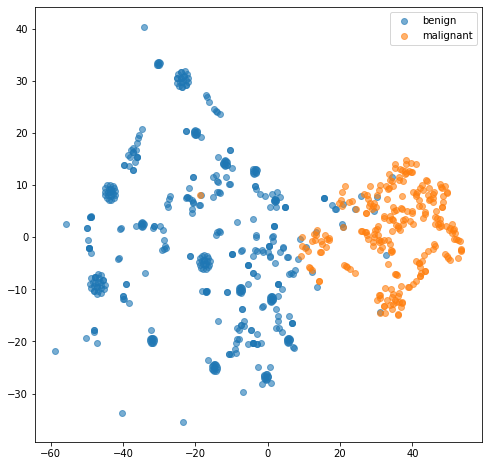

In [37]:
visualize(TSNE(2, perplexity=15).fit_transform(X), y)

In [38]:
# Exercise: Create a t-SNE visualization of the Bike Sharing data set!
fname = '../_data/bike_sharing_data.txt'
df = pd.read_csv(fname)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [39]:
# Extract input matrix.
columns = [
    'season', 'yr', 'mnth', 'hr', 'holiday',
    'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
    'hum', 'windspeed'
]

df[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [46]:
def Visualize2(Z,y):
    plt.figure(figsize=(8,8))
    plt.scatter(Z[:,0] , Z[:,1] ,c = y, alpha=0.6)
    plt.colorbar()

In [47]:
X = df[columns].values
X /= X.std(axis=0)

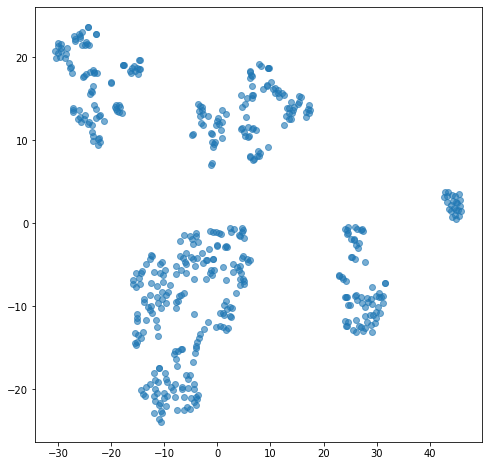

In [48]:
visualize2(TSNE(2).fit_transform(X[:500]))

CPU times: user 11.3 s, sys: 19.7 ms, total: 11.4 s
Wall time: 6.53 s


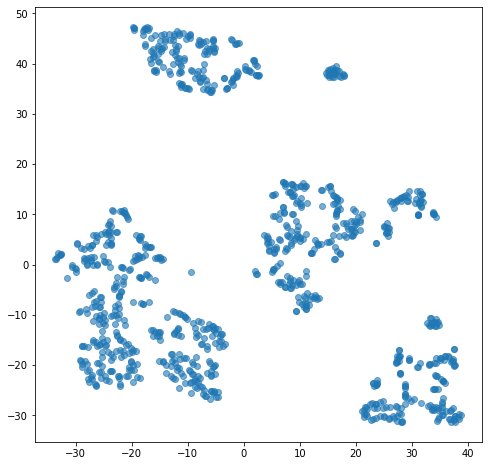

In [49]:
%time visualize2(TSNE(2).fit_transform(X[:1000]))

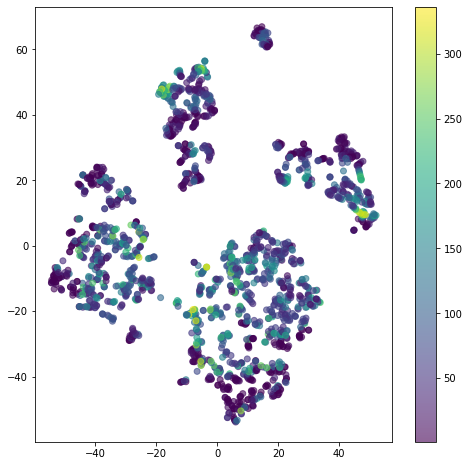

In [50]:
n = 2000
Z = TSNE(2).fit_transform(X[:n])
y = df['cnt'].values
Visualize2(Z,y[:n])